Fold 1
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8720 - loss: 0.4218 - val_accuracy: 0.9629 - val_loss: 0.1170
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9704 - loss: 0.0950 - val_accuracy: 0.9639 - val_loss: 0.1168
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9815 - loss: 0.0565 - val_accuracy: 0.9727 - val_loss: 0.0905
Score for fold 1: loss of 0.0904516875743866; compile_metrics of 0.9726999998092651
Fold 2
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8749 - loss: 0.4272 - val_accuracy: 0.9609 - val_loss: 0.1250
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9717 - loss: 0.0913 - val_accuracy: 0.9647 - val_loss: 0.1150
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9822 - loss: 0.0572 - val_accuracy: 0.9712 - val_loss: 0.1018
Score for fold 2: loss of 0.10181223601102829; compile_metrics of 0.9711999893188477
Fold 3
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━

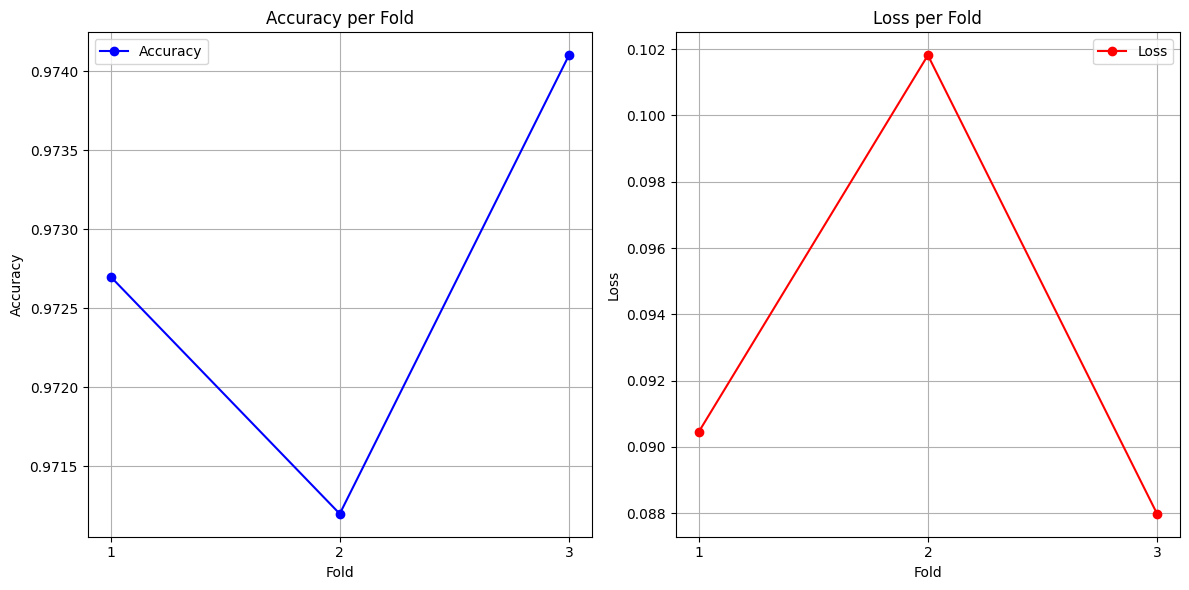

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento
# Para el MLP, aplanamos las imágenes de 28x28 a vectores de 784 elementos
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Categorización de las etiquetas
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Parámetros de Cross Validation
kfold = KFold(n_splits=3, shuffle=True)

# Almacenar resultados
accuracy_per_fold = []
loss_per_fold = []

# CROSS VALIDATION
fold_no = 1
for train_index, val_index in kfold.split(train_images, train_labels):
    print(f"Fold {fold_no}")

    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # Construir el modelo MLP para cada fold
    model = models.Sequential()
    model.add(layers.Dense(729, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dense(243, activation='relu'))
    model.add(layers.Dense(81, activation='relu'))
    #model.add(layers.Dense(27, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Entrenar el modelo en los datos de entrenamiento del pliegue
    history = model.fit(X_train, y_train,
                        epochs=3,
                        batch_size=64,
                        validation_data=(X_val, y_val),
                        verbose=1)

    # Evaluar el modelo en los datos de validación del pliegue
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f"Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}")
    accuracy_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    fold_no += 1

# Resultados finales del cross-validation
print('Resultados por pliegue:')
for i in range(0, len(accuracy_per_fold)):
  print(f"> Fold {i+1} - Pérdida: {loss_per_fold[i]} - Precisión: {accuracy_per_fold[i]}")
print(f"Precisión promedio: {np.mean(accuracy_per_fold)}")
print(f"Pérdida promedio: {np.mean(loss_per_fold)}")

# Evaluar el modelo final en el conjunto de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Precisión en el conjunto de test: {test_acc}")

# Crear gráfico para mostrar la precisión y pérdida de cada fold
folds = np.arange(1, len(accuracy_per_fold) + 1)

# Gráfico de precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, accuracy_per_fold, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.grid(True)
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(folds, loss_per_fold, marker='o', linestyle='-', color='red', label='Loss')
plt.title('Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.xticks(folds)
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()
